<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Active_Contours_(Snakes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Active Contours (also known as Snakes) is a computer vision technique used for object boundary detection in an image. Below is an example of implementing Active Contours in Python using the skimage library.

1. Import Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour

2. Load the image

In [15]:
image_path = "https://imgs.search.brave.com/ZcSD4osNOQorPZtm9wEmsJejhCA0TLbjxBh9nY52GwM/rs:fit:500:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvMTcx/NTgwNTk2L3Bob3Rv/L2V1cm8tY29pbi5q/cGc_cz02MTJ4NjEy/Jnc9MCZrPTIwJmM9/MG1LNngwN2k0dnFu/NlM1RjEwdGJOcWs0/RmYzeFlacEZHRXpI/T0JuMGxfST0"
image = io.imread(image_path)

3. Convert to grayscale

In [16]:
gray_image = color.rgb2gray(image)

4. Smooth the image to reduce noise

In [17]:
smoothed_image = gaussian(gray_image, sigma=2)

5.  Define initial snake (circle around the object of interest)

In [18]:
s = np.linspace(0, 2 * np.pi, 400)  # Parameter for a circle
x = 300 + 300 * np.cos(s)  # Adjust the center (x=220) and radius (100)
y = 300 + 300 * np.sin(s)  # Adjust the center (y=150) and radius (100)
init_snake = np.array([x, y]).T  # Transpose to create a list of (x, y) points

6. Perform active contour segmentation

In [19]:
snake = active_contour(
    smoothed_image,
    init_snake,
    alpha=0.01,  # Snake smoothness
    beta=0.1,    # Snake stiffness
    gamma=0.01,  # Step size
    max_num_iter=2500,
)

7. Plot the results

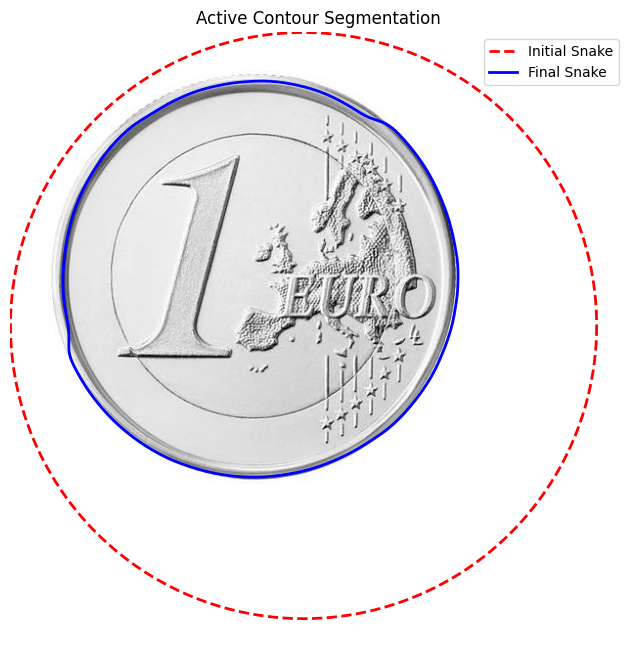

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(gray_image, cmap="gray")
ax.plot(init_snake[:, 0], init_snake[:, 1], '--r', lw=2, label="Initial Snake")
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=2, label="Final Snake")
ax.legend()
ax.set_title("Active Contour Segmentation")
ax.axis('off')
plt.show()